In [18]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/animal-image-dataset-90-different-animals


In [15]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report


In [16]:
#The GPU is being used or not
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print('GPU is being used.')
else:
    print('GPU is not being used.')

GPU is being used.


#Improvements Made:

Added sorting to class list for consistency

Skipped hidden files (e.g. .DS_Store)

Counted and displayed number of images per class

Used Pathlib for cleaner path handling

Added sample output for clarity



In [20]:
import os
from pathlib import Path

# Path to the dataset
dataset_path = Path("/kaggle/input/animal-image-dataset-90-different-animals/animals/animals")

# Get list of all valid class folders (excluding system files)
classes = sorted([folder.name for folder in dataset_path.iterdir() if folder.is_dir()])
num_classes = len(classes)

# Display the number of classes and class names
print(f"✅ Number of Classes: {num_classes}")
print("📂 Class Names:")
for cls in classes:
    print(f"  - {cls}")

# Optional: Display number of images per class
print("\n📸 Image Count per Class:")
for cls in classes:
    img_count = len(list((dataset_path / cls).glob("*.*")))
    print(f"  {cls}: {img_count} images")


✅ Number of Classes: 90
📂 Class Names:
  - antelope
  - badger
  - bat
  - bear
  - bee
  - beetle
  - bison
  - boar
  - butterfly
  - cat
  - caterpillar
  - chimpanzee
  - cockroach
  - cow
  - coyote
  - crab
  - crow
  - deer
  - dog
  - dolphin
  - donkey
  - dragonfly
  - duck
  - eagle
  - elephant
  - flamingo
  - fly
  - fox
  - goat
  - goldfish
  - goose
  - gorilla
  - grasshopper
  - hamster
  - hare
  - hedgehog
  - hippopotamus
  - hornbill
  - horse
  - hummingbird
  - hyena
  - jellyfish
  - kangaroo
  - koala
  - ladybugs
  - leopard
  - lion
  - lizard
  - lobster
  - mosquito
  - moth
  - mouse
  - octopus
  - okapi
  - orangutan
  - otter
  - owl
  - ox
  - oyster
  - panda
  - parrot
  - pelecaniformes
  - penguin
  - pig
  - pigeon
  - porcupine
  - possum
  - raccoon
  - rat
  - reindeer
  - rhinoceros
  - sandpiper
  - seahorse
  - seal
  - shark
  - sheep
  - snake
  - sparrow
  - squid
  - squirrel
  - starfish
  - swan
  - tiger
  - turkey
  - turtle
  - wh

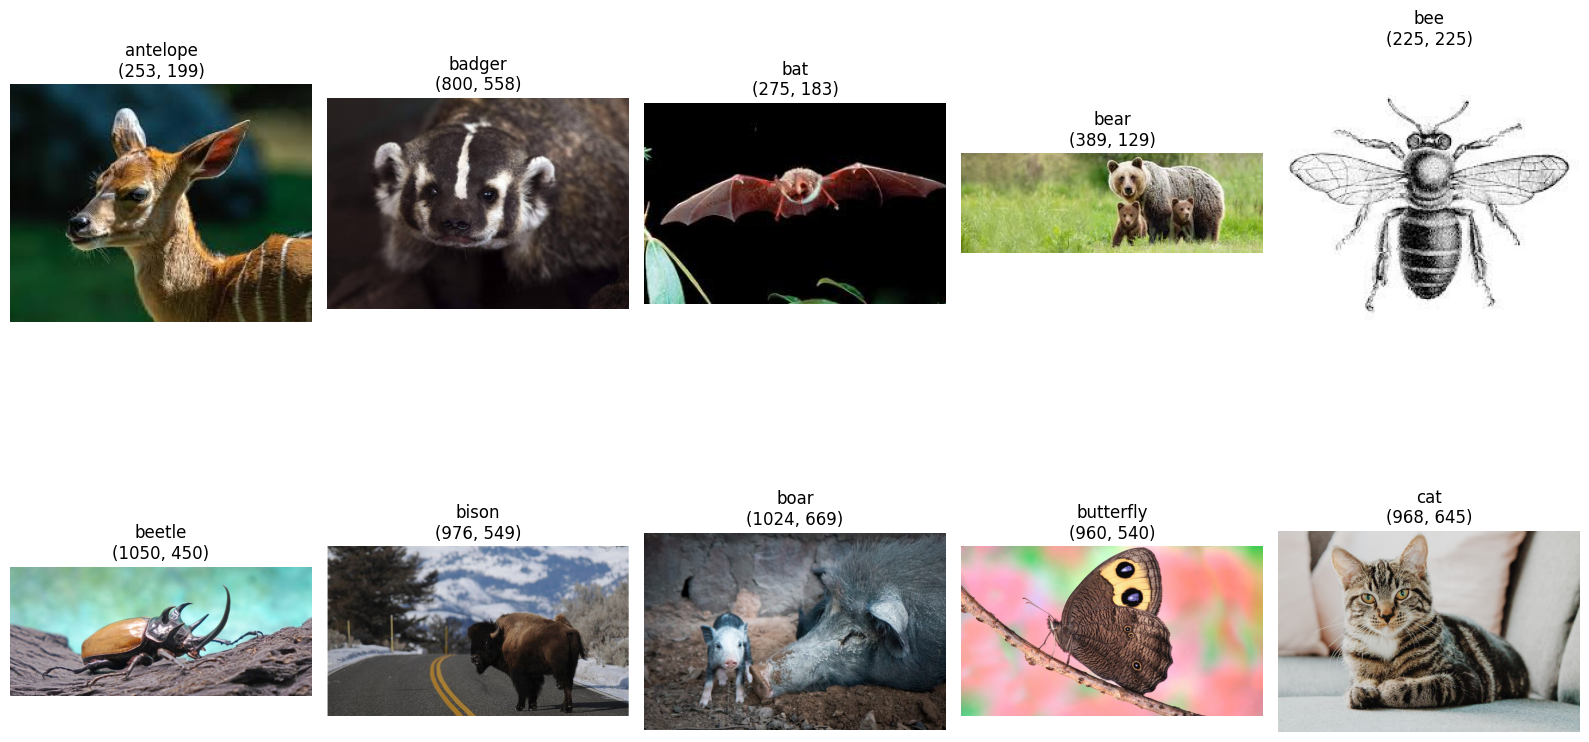

In [21]:
import matplotlib.pyplot as plt
import random
from pathlib import Path
from PIL import Image

# Path to dataset
dataset_path = Path("/kaggle/input/animal-image-dataset-90-different-animals/animals/animals")

# List classes (folders only)
classes = sorted([f.name for f in dataset_path.iterdir() if f.is_dir()])

# Plot 10 random classes
plt.figure(figsize=(16, 10))

for i, class_name in enumerate(classes[:10]):
    class_folder = dataset_path / class_name
    image_files = list(class_folder.glob("*.*"))

    if not image_files:
        continue  # Skip empty folders

    # Random image
    img_path = random.choice(image_files)

    try:
        img = Image.open(img_path)
        plt.subplot(2, 5, i+1)
        plt.imshow(img)
        plt.title(f'{class_name}\n{img.size}')
        plt.axis('off')
    except Exception as e:
        print(f"❌ Could not open image {img_path}: {e}")

plt.tight_layout()
plt.show()
